# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [17]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      age <- runif(100,80,200)
      x_error <- rnorm(n=100,sd=50)
      x <- beta_x0 + beta_xa*age + x_error
      #changing c to z 
      z_error <- rnorm(n=100,sd=85)
      z <- beta_c0 + beta_ca*age + beta_cx*x + z_error
      return(data.frame(age=age,x=x,z=z)) # it's actually bad form to have a variable named "c" in R, my bad...
}
set.seed(5417)
dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,z
,<dbl>,<dbl>,<dbl>
1,131.32427,142.83742,674.37575
2,93.48727,98.86841,513.18531
3,156.23457,165.21950,561.74761
4,86.47280,102.45450,314.15265
5,154.93349,-75.07006,-61.89084
6,132.12335,59.25040,410.52623


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [20]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))

a) Plot the relationship between age and reading comprehension. 

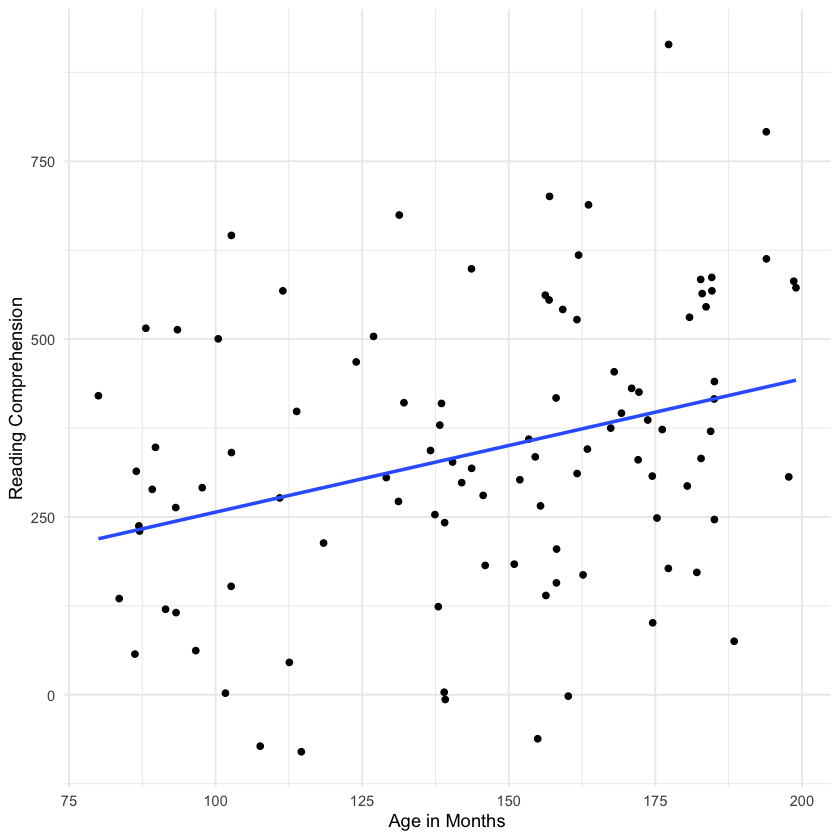

In [34]:
ggplot(dat, aes(x=age, y=z)) + geom_point() + geom_smooth(method='lm', formula='y~x', se=F) +
labs(x="Age in Months", y="Reading Comprehension") +
theme_minimal()

b) Plot the relationship between reading experience, age, and reading comprehension.

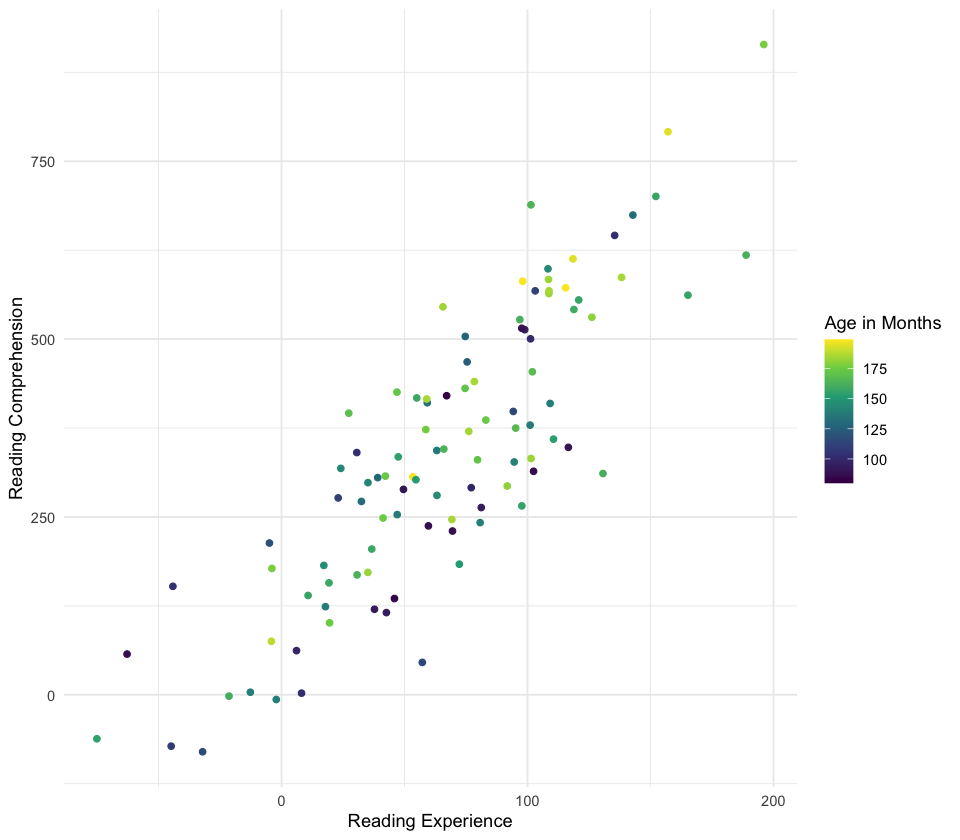

In [36]:
ggplot(dat, aes(x=x, y=z, color=age)) + geom_point() +  scale_color_viridis_c() +
labs(x="Reading Experience", y="Reading Comprehension", color="Age in Months") +
theme_minimal()

---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [13]:
suppressMessages(library(mediation))

Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [37]:
fitM <-lm(x ~ age, data=dat)
summary(fitM)
fitY <-lm(z ~ age + x, data=dat)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
summary(fitMed)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.023  -32.753    2.383   30.895  117.955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  13.3625    22.3061   0.599   0.5505  
age           0.3653     0.1498   2.438   0.0166 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.47 on 98 degrees of freedom
Multiple R-squared:  0.0572,	Adjusted R-squared:  0.04758 
F-statistic: 5.946 on 1 and 98 DF,  p-value: 0.01655



Call:
lm(formula = z ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-246.870  -75.751   -8.532   80.249  222.780 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.7892    45.5638   0.588   0.5579    
age           0.7102     0.3145   2.258   0.0262 *  
x             3.1854     0.2060  15.466   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 102.9 on 97 degrees of freedom
Multiple R-squared:  0.7405,	Adjusted R-squared:  0.7352 
F-statistic: 138.4 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.159        0.245         2.10   0.018 *  
ADE               0.719        0.116         1.30   0.020 *  
Total Effect      1.879        0.794         2.93  <2e-16 ***
Prop. Mediated    0.616        0.240         0.91   0.018 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 
> *Write your response here* 
<br> There is a significant relationship between age and reading comprephension, as well a significant relationship between age, reading comprehesion,and reading experience. There is a significant indirect effect (ACME) of reading experience on reading comprehesion (holding age constant). And there is a significant direct effect (ACE) of age on reading comprehension (holding reading experience constant). Overall, there is a significant total effect of the direct effect of age and the indirect effect of reading experience on reading comprehesion. Of the total effect about 62% of the effect of age on reading comprehension goes through/is explained by reading experience. 
<br> Perhaps the analysis yielded these results because the a unit increase in reading experience increases the reading comprehension score by more units than a unit increase in age. So we're picking up on these mediation effect because reading experience might explain more of the variance in reading comprehension than age. 

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [38]:
set.seed(5417)
run_analysis <-function(stimdata){
    fitM <-lm(x ~ age, data=stimdata)
    fitY <-lm(z ~ age + x, data=stimdata)
    fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
    out <-c(ACME_est=fitMed$d0,ACME_p=fitMed$d0.p,ADE_est=fitMed$z0,ADE_p=fitMed$z0.p)
    out%>% return
}
   
run_analysis(dat)

ACME_est    ACME_p   ADE_est     ADE_p 
1.1594883 0.0180000 0.7082422 0.0160000

Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [48]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    # Initialize simouts matrix for storing each output from run_analysis()
    simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
    
    # Start simulating
    for (i in 1:num_simulations) {
      stim <-(simulate_data(sample_size, 
                            age_lo, 
                            age_hi, 
                            beta_xa, 
                            beta_x0, 
                            sd_x, 
                            beta_ca, 
                            beta_cx, 
                            beta_c0, 
                            sd_c))
        simouts[i,] <- run_analysis(stimdata=stim)
      
    }
    
    # Calculate coverage for both ACME and ADE estimates using p-values in simouts
    ACME_cov =  mean(simouts[,2] <= alpha)
    ADE_cov =  mean(simouts[,4] <= alpha)

    return(data.frame(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [49]:
repeat_analysis(10, .01,sample_size, age_lo, age_hi, beta_xa, beta_x0, 
                sd_x, beta_ca, beta_cx, beta_c0, sd_c)


ACME_cov,ADE_cov
<dbl>,<dbl>
0.7,0.2


Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [51]:
results <-expand.grid(sample_size=seq(50,150, by=25),alpha=.01) %>%
        mutate(stimID=1:nrow(.)) %>%
        nest(parameters := c(sample_size, alpha)) %>%
        mutate(coverage =map (
            parameters,
            ~ repeat_analysis(
                10,
                .$alpha,
                .$sample_size,
                age_lo,
                age_hi,
                beta_xa,
                beta_x0,
                sd_x,
                beta_ca,
                beta_cx,
                beta_c0,
                sd_c
                )
        )) %>% 
    unnest(c(parameters,coverage))



Print your results. 

In [52]:
results


stimID,sample_size,alpha,ACME_cov,ADE_cov
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,0.01,0.5,0.5
2,75,0.01,0.9,0.6
3,100,0.01,0.9,0.7
4,125,0.01,0.9,0.9
5,150,0.01,0.6,0.9


If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> *Write your response here.* 
<br> Base on the results, we would need a sample size of at least 150 to detect both an indirect and direct effects if they exist. As sample size increases, the likelyhood of finding a direct and indirect effect below our alpha criterion increases.  

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
> *Write your response here.* 
<br> We generated age age with `runif` which generates a uniform distrubtion from just the sample size and max and min age (with no central tendemcy). In constrast, we generated reading experience and reading comprehension (our noise terms) with `rnorm` which generates numbers using a normal distribution based on central tendency. These variables are going to vary more similarly than the variable with a uniform distrubtion. Additionally, our mediating variable was generated by taking into account: the average experience (beta_x0), the relationship between experience and age (beta_xa), and an error term(x_error).  

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Danielle F., Avital P., Delainey W.*